## Pré-processamento dos dados

In [127]:
import os

cwd = os.getcwd()

In [128]:
import pandas as pd


df = pd.read_csv(cwd + '/data/posts_clean.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105603 entries, 0 to 105602
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Post Link         105603 non-null  int64 
 1   Title             105603 non-null  object
 2   Body              105603 non-null  object
 3   Tags              105603 non-null  object
 4   CreationDate      105603 non-null  object
 5   Answer Date       105603 non-null  object
 6   AcceptedAnswerId  105603 non-null  int64 
 7   id                105603 non-null  int64 
 8   score             105603 non-null  int64 
 9   complete_text     105602 non-null  object
 10  normalized_text   105598 non-null  object
dtypes: int64(4), object(7)
memory usage: 8.9+ MB


In [4]:
df.head()

,Post Link,Title,Body,Tags,CreationDate,Answer Date,AcceptedAnswerId,id,score
0,11227809,Why is processing a sorted array faster than p...,<p>Here is a piece of C++ code that shows some...,<java><c++><performance><cpu-architecture><bra...,2012-06-27 13:51:36,2012-06-27 13:56:42,11227902,11227902,26631
1,927358,How do I undo the most recent local commits in...,<p>I accidentally committed the wrong files to...,<git><version-control><git-commit><undo>,2009-05-29 18:09:14,2009-05-29 18:13:42,927386,927386,24839
2,2003505,How do I delete a Git branch locally and remot...,<h4>Failed Attempts to Delete a Remote Branch:...,<git><version-control><git-branch><git-push><g...,2010-01-05 01:12:15,2010-01-05 01:13:55,2003515,2003515,19584
3,292357,What is the difference between 'git pull' and ...,"<p>What are the differences between <a href=""h...",<git><version-control><git-pull><git-fetch>,2008-11-15 09:51:09,2008-11-15 09:52:40,292359,292359,13375
4,231767,"What does the ""yield"" keyword do?",<p>What is the use of the <code>yield</code> k...,<python><iterator><generator>,2008-10-23 22:21:11,2008-10-23 22:48:44,231855,231855,12274


In [5]:
!pip install bs4

In [6]:
from bs4 import BeautifulSoup
import unicodedata
import re


def remove_html_tags_func(text):
    '''
    Removes HTML-Tags from a string, if present
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Clean string without HTML-Tags
    ''' 
    return BeautifulSoup(text, 'html.parser').get_text()


def remove_url_func(text):
    '''
    Removes URL addresses from a string, if present
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Clean string without URL addresses
    ''' 
    return re.sub(r'https?://\S+|www\.\S+', '', text)


def remove_accented_chars_func(text):
    '''
    Removes all accented characters from a string, if present
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Clean string without accented characters
    '''
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')


def remove_punctuation_func(text):
    '''
    Removes all punctuation from a string, if present
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Clean string without punctuations
    '''
    return re.sub(r'[^a-zA-Z0-9]', ' ', text)


def remove_irr_char_func(text):
    '''
    Removes all irrelevant characters (numbers and punctuation) from a string, if present
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Clean string without irrelevant characters
    '''
    return re.sub(r'[^a-zA-Z]', ' ', text)


def remove_extra_whitespaces_func(text):
    '''
    Removes extra whitespaces from a string, if present
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Clean string without extra whitespaces
    ''' 
    return re.sub(r'^\s*|\s\s*', ' ', text).strip()


def word_count_func(text):
    '''
    Counts words within a string
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Number of words within a string, integer
    ''' 
    return len(text.split())

In [7]:
!pip install nltk

In [8]:
# nltk.download()

In [9]:
import nltk

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

def text_normaliser(text):
    words = word_tokenize(text)
    
    stop_words = stopwords.words('english')
    filtered_words = [word for word in words if word not in stop_words]
    
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in filtered_words]
    
    return ' '.join(word for word in stemmed)

In [10]:
def pre_process_text(text):
    text = remove_html_tags_func(text)
    text = remove_url_func(text)
    text = remove_accented_chars_func(text)
    text = remove_punctuation_func(text)
    text = remove_irr_char_func(text)
    text = remove_extra_whitespaces_func(text)
    text = text.lower()
    
    text = text_normaliser(text)
    
    return text

In [11]:
df['complete_text'] = df.Title + " " + df.Body

In [12]:
df.complete_text.iloc[0]

'Why is processing a sorted array faster than processing an unsorted array? <p>Here is a piece of C++ code that shows some very peculiar behavior. For some strange reason, sorting the data (<em>before</em> the timed region) miraculously makes the loop almost six times faster.</p>\r\n<pre class="lang-cpp prettyprint-override"><code>#include &lt;algorithm&gt;\r\n#include &lt;ctime&gt;\r\n#include &lt;iostream&gt;\r\n\r\nint main()\r\n{\r\n    // Generate data\r\n    const unsigned arraySize = 32768;\r\n    int data[arraySize];\r\n\r\n    for (unsigned c = 0; c &lt; arraySize; ++c)\r\n        data[c] = std::rand() % 256;\r\n\r\n    // !!! With this, the next loop runs faster.\r\n    std::sort(data, data + arraySize);\r\n\r\n    // Test\r\n    clock_t start = clock();\r\n    long long sum = 0;\r\n    for (unsigned i = 0; i &lt; 100000; ++i)\r\n    {\r\n        for (unsigned c = 0; c &lt; arraySize; ++c)\r\n        {   // Primary loop\r\n            if (data[c] &gt;= 128)\r\n               

In [13]:
df.complete_text = df.complete_text.apply(lambda x: pre_process_text(x))

/home/michelly/anaconda3/envs/deep-learning/lib/python3.9/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [14]:
df.complete_text.iloc[0]

'process sort array faster process unsort array piec c code show peculiar behavior strang reason sort data time region miracul make loop almost six time faster includ algorithm includ ctime includ iostream int main gener data const unsign arrays int data arrays unsign c c arrays c data c std rand next loop run faster std sort data data arrays test clock start clock long long sum unsign unsign c c arrays c primari loop data c sum data c doubl elapsedtim static cast doubl clock start clock per sec std cout elapsedtim n std cout sum sum n without std sort data data arrays code run second sort data code run second sort take time one pass array actual worth need calcul unknown array initi thought might languag compil anomali tri java import java util array import java util random public class main public static void main string arg gener data int arrays int data new int arrays random rnd new random int c c arrays c data c rnd nextint next loop run faster array sort data test long start syst

### Criando o BoW

In [15]:
words_post = df.complete_text.apply(lambda x: x)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(words_post)

CountVectorizer()

In [17]:
print("Vocabulary: ", vectorizer.vocabulary_)

Vocabulary:  {'process': 91794, 'sort': 110636, 'array': 6601, 'faster': 38159, 'unsort': 125349, 'piec': 88857, 'code': 19122, 'show': 107605, 'peculiar': 87758, 'behavior': 10558, 'strang': 113459, 'reason': 96196, 'data': 25677, 'time': 119785, 'region': 96995, 'miracul': 72627, 'make': 69090, 'loop': 67920, 'almost': 3936, 'six': 108767, 'includ': 55391, 'algorithm': 3536, 'ctime': 24228, 'iostream': 58033, 'int': 57075, 'main': 68850, 'gener': 43853, 'const': 21240, 'unsign': 125339, 'arrays': 6685, 'std': 112919, 'rand': 95269, 'next': 79076, 'run': 101064, 'test': 117485, 'clock': 18632, 'start': 112318, 'long': 67784, 'sum': 114770, 'primari': 91423, 'doubl': 31509, 'elapsedtim': 33822, 'static': 112729, 'cast': 15480, 'per': 87904, 'sec': 103445, 'cout': 22753, 'without': 131811, 'second': 103464, 'take': 116243, 'one': 83537, 'pass': 87087, 'actual': 1475, 'worth': 132328, 'need': 78138, 'calcul': 14498, 'unknown': 125044, 'initi': 56036, 'thought': 119351, 'might': 72233, 'l

In [18]:
len(vectorizer.vocabulary_)

135763

In [19]:
# Encode the Document
vector = vectorizer.transform(words_post)

In [20]:
# Summarizing the Encoded Texts
print("Encoded Document is:")
# print(vector.toarray())

Encoded Document is:


## Análise exploratória dos dados

In [21]:
# !pip install wordcloud

In [22]:
all_text = ' '.join(word for word in df.complete_text)
all_text = all_text.split(' ')

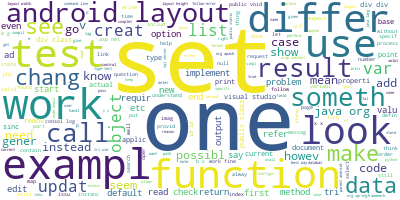

In [23]:
# Import the wordcloud library
from wordcloud import WordCloud# Join the different processed titles together.

long_string = ','.join(all_text)# Create a WordCloud object

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')# Generate a word cloud

wordcloud.generate(long_string)# Visualize the word cloud

wordcloud.to_image()

## Construindo o LDA

In [24]:
df['input'] = df.complete_text.apply(lambda x: x.split(' '))

In [25]:
df.input

0         [process, sort, array, faster, process, unsort...
1         [undo, recent, local, commit, git, accident, c...
2         [delet, git, branch, local, remot, fail, attem...
3         [differ, git, pull, git, fetch, differ, git, p...
4         [yield, keyword, use, yield, keyword, python, ...
                                ...                        
105598    [test, angular, router, navig, run, miss, rout...
105599    [creat, vector, specif, interv, r, question, c...
105600    [mix, web, api, asp, net, mvc, page, one, proj...
105601    [hash, string, numer, valu, postgresql, need, ...
105602    [enabl, javascript, webview, android, use, jav...
Name: input, Length: 105603, dtype: object

In [26]:
!pip install gensim

In [27]:
inputs = df.input

In [28]:
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(inputs)

# Create Corpus
texts = inputs # Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]# View

print(corpus[:1][0][:30])


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 11), (6, 10), (7, 1), (8, 1), (9, 19), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 4), (16, 5), (17, 2), (18, 1), (19, 2), (20, 1), (21, 18), (22, 1), (23, 2), (24, 1), (25, 2), (26, 1), (27, 5), (28, 1), (29, 1)]


In [29]:
from pprint import pprint # number of topics

num_topics = 10 # Build LDA model

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics) # Print the Keyword in the 10 topics

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.014*"use" + 0.009*"div" + 0.007*"error" + 0.006*"class" + 0.006*"get" + '
  '0.006*"android" + 0.006*"tri" + 0.005*"like" + 0.005*"run" + 0.005*"app"'),
 (1,
  '0.012*"string" + 0.012*"use" + 0.011*"function" + 0.009*"class" + '
  '0.009*"name" + 0.008*"file" + 0.007*"like" + 0.007*"c" + 0.007*"work" + '
  '0.007*"creat"'),
 (2,
  '0.013*"use" + 0.010*"string" + 0.009*"file" + 0.009*"get" + 0.008*"like" + '
  '0.008*"name" + 0.007*"type" + 0.007*"tri" + 0.007*"new" + 0.006*"set"'),
 (3,
  '0.015*"use" + 0.007*"code" + 0.007*"return" + 0.007*"get" + 0.007*"b" + '
  '0.007*"one" + 0.007*"like" + 0.006*"c" + 0.006*"way" + 0.006*"id"'),
 (4,
  '0.013*"use" + 0.008*"code" + 0.007*"function" + 0.007*"get" + 0.007*"like" '
  '+ 0.007*"id" + 0.006*"java" + 0.006*"valu" + 0.006*"error" + 0.006*"name"'),
 (5,
  '0.010*"use" + 0.010*"valu" + 0.010*"data" + 0.008*"file" + 0.007*"android" '
  '+ 0.007*"code" + 0.006*"like" + 0.006*"java" + 0.006*"get" + 0.006*"id"'),
 (6,
  '0.015*"use" +

In [30]:
# !pip install pyLDAvis

In [31]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join(cwd + '/results/ldavis_prepared_'+ str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, cwd + '/results/ldavis_prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

/home/michelly/anaconda3/envs/deep-learning/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/home/michelly/anaconda3/envs/deep-learning/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/michelly/anaconda3/envs/deep-learning/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/michelly/anaconda3/envs/deep-learning/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.013371 -0.000318       1        1  12.827830
6      0.038224  0.017303       2        1  11.693595
2      0.004172  0.018040       3        1  11.626501
3      0.021691  0.004506       4        1  11.543041
8     -0.023221 -0.003209       5        1  10.283814
0     -0.036447  0.023523       6        1  10.018505
1      0.012225  0.008296       7        1   8.853876
9     -0.007875 -0.028532       8        1   8.430328
4     -0.004406  0.001873       9        1   7.413685
5      0.009008 -0.041481      10        1   7.308826, topic_info=         Term          Freq         Total Category  logprob  loglift
1013  android  37378.000000  37378.000000  Default  30.0000  30.0000
111      file  53531.000000  53531.000000  Default  29.0000  29.0000
737       div  19121.000000  19121.000000  Default  28.0000  28.0000
92     string  43683.000000  43683.000000  Default  27.0000  27.0000
5       array  17779.000000  17779.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
55        new   2451.560677  34261.550507  Topic10  -5.4180  -0.0212
58        one   2220.725590  28192.821707  Topic10  -5.5169   0.0749
215      name   2391.946907  38109.672440  Topic10  -5.4426  -0.1523
357      user   1962.365369  26678.742062  Topic10  -5.6406   0.0064
100       tri   1982.784942  36068.709296  Topic10  -5.6302  -0.2848

[1009 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2658      1  0.127320  abstract
2658      2  0.376599  abstract
2658      3  0.074382  abstract
2658      4  0.065670  abstract
2658      5  0.070361  abstract
...     ...       ...       ...
488       6  0.058841      yyyi
488       7  0.032095      yyyi
488       8  0.033432      yyyi
488       9  0.208619      yyyi
488      10  0.038782      yyyi

[4002 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 7, 3, 4, 9, 1, 2, 10, 5, 6])

In [32]:
import gc

gc.collect()

231

### Criando o GSDMM

In [38]:
from gsdmm import MovieGroupProcess

In [39]:
vocab = set(vectorizer.vocabulary_.keys())

In [41]:
n_terms = len(vocab)

In [40]:
inputs

0         [process, sort, array, faster, process, unsort...
1         [undo, recent, local, commit, git, accident, c...
2         [delet, git, branch, local, remot, fail, attem...
3         [differ, git, pull, git, fetch, differ, git, p...
4         [yield, keyword, use, yield, keyword, python, ...
                                ...                        
105598    [test, angular, router, navig, run, miss, rout...
105599    [creat, vector, specif, interv, r, question, c...
105600    [mix, web, api, asp, net, mvc, page, one, proj...
105601    [hash, string, numer, valu, postgresql, need, ...
105602    [enabl, javascript, webview, android, use, jav...
Name: input, Length: 105603, dtype: object

In [42]:
%%time

mgp = MovieGroupProcess(K=15, alpha=0.1, beta=1, n_iters=10)

CPU times: user 15 µs, sys: 0 ns, total: 15 µs
Wall time: 18.1 µs


In [43]:
%%time

y = mgp.fit(inputs, n_terms)

In stage 0: transferred 98159 clusters with 15 clusters populated
In stage 1: transferred 29305 clusters with 12 clusters populated
In stage 2: transferred 8529 clusters with 5 clusters populated
In stage 3: transferred 5170 clusters with 4 clusters populated
In stage 4: transferred 3945 clusters with 4 clusters populated
In stage 5: transferred 3156 clusters with 4 clusters populated
In stage 6: transferred 2347 clusters with 4 clusters populated
In stage 7: transferred 2147 clusters with 4 clusters populated
In stage 8: transferred 2124 clusters with 4 clusters populated
In stage 9: transferred 2202 clusters with 4 clusters populated
In stage 10: transferred 2155 clusters with 4 clusters populated
In stage 11: transferred 2190 clusters with 4 clusters populated
In stage 12: transferred 2110 clusters with 4 clusters populated
In stage 13: transferred 2158 clusters with 4 clusters populated
In stage 14: transferred 2283 clusters with 4 clusters populated
In stage 15: transferred 2226 c

KeyboardInterrupt: 

In [45]:
import numpy as np

doc_count = np.array(mgp.cluster_doc_count)
print('Number of documents per topic :', doc_count)

Number of documents per topic : [    0     2     0     0     0     2 36153     0     0     0     0     0
     0     0 69445]


In [46]:
top_index = doc_count.argsort()[-15:][::-1]
print('Most important clusters (by number of docs inside):', top_index)

Most important clusters (by number of docs inside): [14  6  5  1 13 12 11 10  9  8  7  4  3  2  0]


In [47]:
def top_words(cluster_word_distribution, top_cluster, values):
    for cluster in top_cluster:
        sort_dicts =sorted(mgp.cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        print('Cluster %s : %s'%(cluster,sort_dicts))
        print('-'*120)

In [50]:
topic_dict = {}
topic_names = ['Topic #1',
               'Topic #2',
               'Topic #3',
               'Topic #4',
               'Topic #5',
               'Topic #6',
               'Topic #7',
               'Topic #8',
               'Topic #9',
               'Topic #10',
               'Topic #11',
               'Topic #12',
               'Topic #13',
               'Topic #14',
               'Topic #15'
              ]
for i, topic_num in enumerate(top_index):
    topic_dict[topic_num]=topic_names[i]

In [58]:
def create_topics_dataframe(data_text,  mgp, threshold, topic_dict, stem_text):
    result = pd.DataFrame(columns=['text', 'topic', 'stems'])
    for i, text in enumerate(data_text):
        result.at[i, 'text'] = text
        result.at[i, 'stems'] = stem_text[i]
        prob = mgp.choose_best_label(stem_text[i])
        if prob[1] >= threshold:
            result.at[i, 'topic'] = topic_dict[prob[0]]
        else:
            result.at[i, 'topic'] = 'Other'
    return result

In [63]:
dfx = create_topics_dataframe(data_text=df.complete_text[0:30],  mgp=mgp, threshold=0.3, topic_dict=topic_dict, stem_text=inputs[0:30])

In [64]:
dfx.topic.value_counts(dropna=False)

Topic #1    16
Topic #2    10
Other        4
Name: topic, dtype: int64

In [66]:
dfx.head(30)

,text,topic,stems
0,process sort array faster process unsort array...,Other,"[process, sort, array, faster, process, unsort..."
1,undo recent local commit git accident commit w...,Topic #1,"[undo, recent, local, commit, git, accident, c..."
2,delet git branch local remot fail attempt dele...,Topic #1,"[delet, git, branch, local, remot, fail, attem..."
3,differ git pull git fetch differ git pull git ...,Topic #1,"[differ, git, pull, git, fetch, differ, git, p..."
4,yield keyword use yield keyword python exampl ...,Other,"[yield, keyword, use, yield, keyword, python, ..."
5,json content type use mani standard json conte...,Topic #1,"[json, content, type, use, mani, standard, jso..."
6,remov specif item array remov specif valu arra...,Topic #2,"[remov, specif, item, array, remov, specif, va..."
7,renam local git branch renam local branch yet ...,Topic #1,"[renam, local, git, branch, renam, local, bran..."
8,undo git add commit mistakenli ad file git use...,Topic #1,"[undo, git, add, commit, mistakenli, ad, file,..."
9,oper c read hidden featur dark corner c stl co...,Topic #2,"[oper, c, read, hidden, featur, dark, corner, ..."
